**Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:**

# EJERCICIO 1

$$\frac{1}{25x^2 + 1}, x_0 = 0$$

## Serie de Taylor

Como es evidente, mientras mayor sea el orden del polinomio de Taylor, mejor es la aproximación de la función alrededor de ese punto, por tanto vamos a realizar hasta el polinomio de grado 20.

In [32]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Polinomio de Taylor - Orden: 2: 1 - 25*x**2
Polinomio de Taylor - Orden: 4: 625*x**4 - 25*x**2 + 1
Polinomio de Taylor - Orden: 6: -15625*x**6 + 625*x**4 - 25*x**2 + 1
Polinomio de Taylor - Orden: 8: 390625*x**8 - 15625*x**6 + 625*x**4 - 25*x**2 + 1
Polinomio de Taylor - Orden: 10: -9765625*x**10 + 390625*x**8 - 15625*x**6 + 625*x**4 - 25*x**2 + 1
Polinomio de Taylor - Orden: 12: 244140625*x**12 - 9765625*x**10 + 390625*x**8 - 15625*x**6 + 625*x**4 - 25*x**2 + 1
Polinomio de Taylor - Orden: 14: -6103515625*x**14 + 244140625*x**12 - 9765625*x**10 + 390625*x**8 - 15625*x**6 + 625*x**4 - 25*x**2 + 1


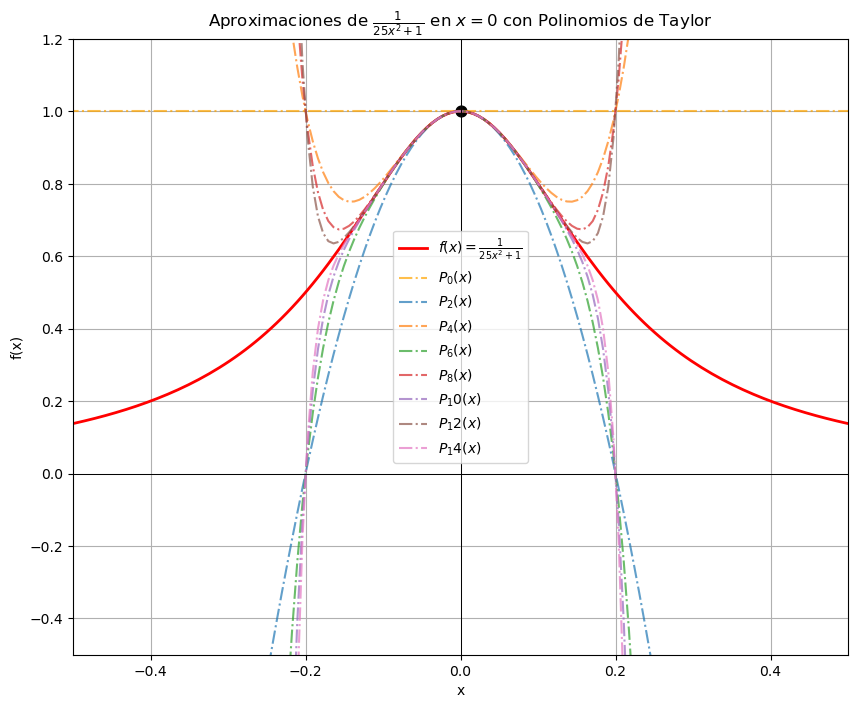

In [44]:
x = sp.symbols('x')
f = 1 / (25 * x ** 2 + 1)
x0 = 0
n = 14

f_lambdified = sp.lambdify(x, f, modules=["numpy"]) # Función Original
x_vals = np.linspace(-1, 1, 300)
f_vals = f_lambdified(x_vals)
f0_vals = np.ones_like(x_vals) # P0: Función Constante

plt.figure(figsize=(10, 8))
plt.plot(x_vals, f_vals, label='$f(x) = \\frac{1}{25x^2 + 1}$', color='red', linewidth=2)
plt.plot(x_vals, f0_vals, label='$P_0(x)$', linestyle='-.', color='orange', alpha=0.7)

for i in range(3, n + 2, 2): #Pn: Polinomios de Taylor, n > 1
    taylor_series = sp.series(f, x, x0, i).removeO()
    print(f'Polinomio de Taylor - Orden: {i - 1}: {taylor_series}')
    taylor_lambdified = sp.lambdify(x, taylor_series, modules=["numpy"])
    taylor_vals = taylor_lambdified(x_vals)
    plt.plot(x_vals, taylor_vals, label=f'$P_{i-1} (x)$', linestyle='-.', alpha=0.7)

plt.axvline(0, color="black", lw=0.7)
plt.axhline(0, color="black", lw=0.7)  
plt.scatter(x0, 1, color='black', s=60)

plt.title('Aproximaciones de $\\frac{1}{25x^2 + 1}$ en $x = 0$ con Polinomios de Taylor')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 1.2)
plt.show()


Para esta función en particular, los términos correspondientes a los órdenes pares tienen coeficientes iguales a cero. Como resultado, dichos términos no aportan ninguna modificación al polinomio de Taylor existente y, por lo tanto, no se incluyen en la demostración.

## Polinomio de Lagrange

In [62]:
from scipy.interpolate import lagrange

Definimos la función:

In [ ]:
def f(x):
    return 1 / (25 * x ** 2 + 1)

Y los parametros iniciales:

* El número de puntos

* El intervalo en donde se encuentran

In [67]:
n = 7
xi = -0.25
xf = 0.25

Como vamos a aproximar alrededor de cero, escogemos un intervalo pequeño.

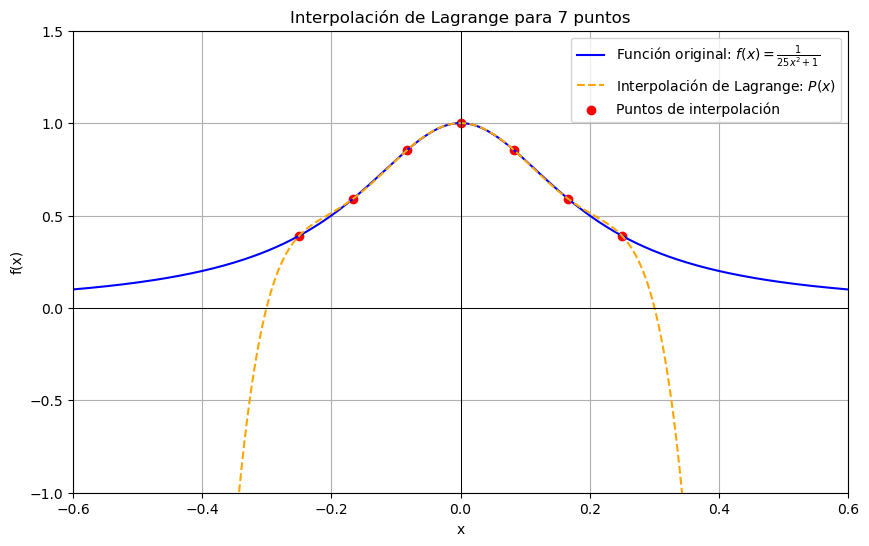

In [80]:
xs = np.linspace(xi, xf, n) 
ys = f(xs)  
polynomial = lagrange(xs, ys)
    
x_vals = np.linspace(-1, 1, 500)
f_vals = f(x_vals)
lagrange_vals = polynomial(x_vals)
    
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='Función original: $f(x) = \\frac{1}{25x^2 + 1}$', color='blue')
plt.plot(x_vals, lagrange_vals, label='Interpolación de Lagrange: $P(x)$', color='orange', linestyle='--')
plt.scatter(xs, ys, color='red', label='Puntos de interpolación')  # Puntos de interpolación
plt.title(f"Interpolación de Lagrange para {n} puntos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.axvline(0, color="black", lw=0.7) 
plt.axhline(0, color="black", lw=0.7) 
plt.ylim(-1, 1.5)
plt.xlim(-0.6, 0.6)
plt.grid()
plt.show()

Obteniendose así la función aproximada dados los puntos en ese intervalo:

In [94]:
print('El polinomio interpolado es:')
print(polynomial)

El polinomio interpolado es:
       6             5         4            3         2
-3066 x - 5.514e-12 x + 420.8 x + 1.35e-13 x - 24.08 x + 1.193e-15 x + 1


# EJERCICIO 2

$$arctan(x), x_0 = 1$$

## Serie de Taylor

In [ ]:
Valores Iniciales

In [132]:
x = sp.symbols('x')
f = sp.atan(x)
x0 = 1
n = 10

Polinomio de Taylor - Orden: 1: x/2 - 1/2 + pi/4
Polinomio de Taylor - Orden: 2: x/2 - (x - 1)**2/4 - 1/2 + pi/4
Polinomio de Taylor - Orden: 3: x/2 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4
Polinomio de Taylor - Orden: 4: x/2 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4
Polinomio de Taylor - Orden: 5: x/2 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4
Polinomio de Taylor - Orden: 6: x/2 + (x - 1)**6/48 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4
Polinomio de Taylor - Orden: 7: x/2 - (x - 1)**7/112 + (x - 1)**6/48 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4
Polinomio de Taylor - Orden: 8: x/2 - (x - 1)**7/112 + (x - 1)**6/48 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4
Polinomio de Taylor - Orden: 9: x/2 + (x - 1)**9/288 - (x - 1)**7/112 + (x - 1)**6/48 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4
Polinomio de Taylor - Orden: 10: x/2 - (x - 1)**10/320 + (x - 1)**9/288 - (x - 1)**7/112 + (x - 1)**6/48 - (x - 1)*

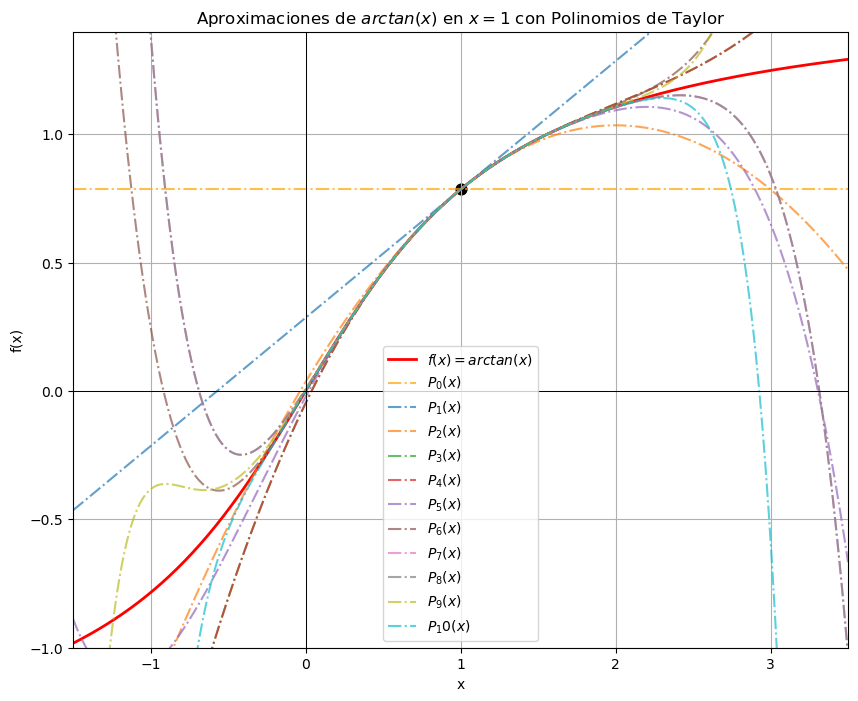

In [134]:
f_lambdified = sp.lambdify(x, f, modules=["numpy"]) # Función Original
x_vals = np.linspace(-1.5, 3.5, 500)
f_vals = f_lambdified(x_vals) # P0: Función Constante
f0_vals = np.full_like(x_vals, np.pi/4)

plt.figure(figsize=(10, 8))
plt.plot(x_vals, f_vals, label='$f(x) = arctan(x)$', color='red', linewidth=2)
plt.plot(x_vals, f0_vals, label='$P_0(x)$', linestyle='-.', color='orange', alpha=0.7)

for i in range(2, n + 2): # Polinomios de Taylor, n > 0
    taylor_series = sp.series(f, x, x0, i).removeO()
    print(f'Polinomio de Taylor - Orden: {i - 1}: {taylor_series}')
    taylor_lambdified = sp.lambdify(x, taylor_series, modules=["numpy"])  
    taylor_vals = taylor_lambdified(x_vals) 
    plt.plot(x_vals, taylor_vals, label=f'$P_{i-1} (x)$', linestyle='-.', alpha=0.7)

plt.axvline(0, color="black", lw=0.7)
plt.axhline(0, color="black", lw=0.7)  
plt.scatter(x0, np.arctan(x0), color='black', s=60)

plt.title('Aproximaciones de $arctan(x)$ en $x = 1$ con Polinomios de Taylor')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.xlim(-1.5, 3.5)
plt.ylim(-1, 1.4)
plt.show()

## Polinomio de Lagrange

In [199]:
def f(x):
    return np.arctan(x)

n = 6
xi = -0.25
xf = 2.25

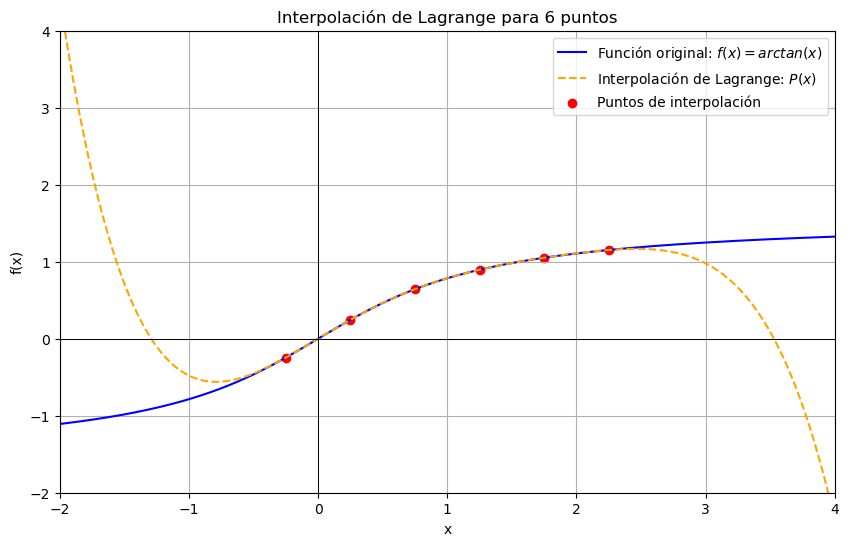

In [201]:
xs = np.linspace(xi, xf, n)  
ys = f(xs) 
polynomial = lagrange(xs, ys)
    
x_vals = np.linspace(-2, 4, 500)
f_vals = f(x_vals)
lagrange_vals = polynomial(x_vals)
    
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='Función original: $f(x) = arctan(x)$', color='blue')
plt.plot(x_vals, lagrange_vals, label='Interpolación de Lagrange: $P(x)$', color='orange', linestyle='--')
plt.scatter(xs, ys, color='red', label='Puntos de interpolación')  # Puntos de interpolación
plt.title(f"Interpolación de Lagrange para {n} puntos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.axvline(0, color="black", lw=0.7)
plt.axhline(0, color="black", lw=0.7) 
plt.ylim(-2, 4)
plt.xlim(-2, 4)
plt.grid()
plt.show()

Obteniendose así la función aproximada dados los puntos en ese intervalo:

In [203]:
print('El polinomio interpolado es:')
print(polynomial)

El polinomio interpolado es:
         5          4          3           2
-0.0294 x + 0.1793 x - 0.3394 x - 0.02659 x + 1.001 x + 0.0009614


**GitHub:** [Tarea6 - @mateobtw18](https://github.com/mateobtw18/Tarea_6)